# Stats sur 5 ans

In [1]:
########## PARAMETRAGE #########
CT_CJ = 5 # 0 pour prendre toutes les catégories juridiques

# Répertoire du fichier en local
CT_DIR_DATA = 'C:/Users/Mscao/OneDrive - INTESCIA/export/'
# Sauvegarde des graphiques
CT_DIR_SAVE = 'Rapport/images/'

from datetime import datetime, timedelta
DTREF = datetime(2018,4,1)
########## PARAMETRAGE #########

## Chargement

In [2]:
# 04/18 Création Morgan SCAO
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

In [3]:
# Lecture
n = 'stats_5_ans_PROD'
if CT_CJ > 0:
    n = n + '_CJ%s' % str(CT_CJ)
n = CT_DIR_DATA + n + '.csv'
print('reading', n, '...')
df = pd.read_csv(n, sep=";", na_values=r"\0")
print(df.shape)
print(len(set(df.siren)), 'SIREN')

y0 = str(DTREF.year)
df = df.rename(columns={'indiScore': 'indiScore'+y0, 'procol': 'procol'+y0, 'indiScoreDate': 'indiScoreDate'+y0})
y1 = str(DTREF.year-1)
df = df.rename(columns={'indiScoreMoins1': 'indiScore'+y1, 'procolMoins1': 'procol'+y1, 'indiScoreDateMoins1': 'indiScoreDate'+y1})
y2 = str(DTREF.year-2)
df = df.rename(columns={'indiScoreMoins2': 'indiScore'+y2, 'procolMoins2': 'procol'+y2, 'indiScoreDateMoins2': 'indiScoreDate'+y2})
y3 = str(DTREF.year-3)
df = df.rename(columns={'indiScoreMoins3': 'indiScore'+y3, 'procolMoins3': 'procol'+y3, 'indiScoreDateMoins3': 'indiScoreDate'+y3})
y4 = str(DTREF.year-4)
df = df.rename(columns={'indiScoreMoins4': 'indiScore'+y4, 'procolMoins4': 'procol'+y4, 'indiScoreDateMoins4': 'indiScoreDate'+y4})

#df[['indiScore'+y1, 'indiScore'+y2, 'indiScore'+y3, 'indiScore'+y4]] = df[['indiScore'+y1, 'indiScore'+y2, 'indiScore'+y3, 'indiScore'+y4]].astype(np.int64)

display(df.head(10))
df.describe()

reading C:/Users/Mscao/OneDrive - INTESCIA/export/stats_5_ans_PROD_CJ5.csv ...


C:\Users\Mscao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,7,9,11,13,15,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2453107, 23)
2453107 SIREN


,siren,procol2018,indiScore2018,indiScoreDate2018,encours,procol2017,indiScore2017,indiScoreDate2017,encoursMoins1,procol2016,...,procol2015,indiScore2015,indiScoreDate2015,encoursMoins3,procol2014,indiScore2014,indiScoreDate2014,encoursMoins4,lastTypeEven,lastTypeEven2
0,5420021,P,0,2014-11-21,0,P,0.0,2014-11-21,0.0,P,...,P,0.0,2014-11-21,0.0,NaN,9.0,2014-01-31,7500.0,"3200,1305","1305,1306"
1,5420120,NaN,9,2017-10-01,30000,NaN,9.0,2015-06-23,30000.0,NaN,...,NaN,9.0,2014-11-12,7500.0,NaN,9.0,2014-02-19,7500.0,"3200,2315",2315
2,5450093,NaN,11,2018-01-06,1891,NaN,14.0,2016-08-17,1975.0,NaN,...,NaN,13.0,2014-06-15,749.0,NaN,12.0,2013-10-28,816.0,3200,"2100,2102,2308"
3,5450119,NaN,3,2012-12-28,0,NaN,3.0,2012-12-28,0.0,NaN,...,NaN,3.0,2012-12-28,0.0,NaN,3.0,2012-12-28,0.0,"3200,3200",2303
4,5480546,P,0,2017-10-26,0,P,6.0,2016-05-12,0.0,NaN,...,P,6.0,2014-11-04,3555.0,P,9.0,2014-02-01,30000.0,"1411,1300","1217,1411,1305"
5,5520028,NaN,12,2013-12-28,17000,NaN,12.0,2013-12-28,17000.0,NaN,...,NaN,12.0,2013-12-28,17000.0,NaN,12.0,2013-12-28,17000.0,NaN,NaN
6,5520077,P,0,2016-09-08,0,P,0.0,2016-09-08,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300,1305
7,5520176,NaN,16,2017-07-25,173647,NaN,16.0,2016-06-22,169905.0,NaN,...,NaN,15.0,2013-06-22,211914.0,NaN,15.0,2013-06-22,211914.0,3200,2315
8,5520242,P,8,2015-07-08,30000,PL,8.0,2015-07-08,30000.0,PL,...,P,11.0,2014-11-10,150000.0,P,7.0,2013-10-15,15000.0,3200,1800
9,5520325,NaN,18,2015-10-21,500000,NaN,18.0,2015-10-21,500000.0,NaN,...,NaN,18.0,2014-11-04,500000.0,NaN,17.0,2013-09-10,500000.0,3200,NaN


,siren,indiScore2018,encours,indiScore2017,encoursMoins1,indiScore2016,encoursMoins2,indiScore2015,encoursMoins3,indiScore2014,encoursMoins4
count,2.453107e+06,2.453107e+06,2.453107e+06,1.305563e+06,1.305561e+06,702486.000000,702484.000000,476860.000000,476858.000000,374261.000000,374261.000000
mean,6.114417e+08,8.632252e+00,1.323493e+04,8.949066e+00,1.906376e+04,9.626290,28993.686436,9.684618,37128.807435,10.028723,41959.478297
std,1.815512e+08,4.902318e+00,4.573248e+04,4.662256e+00,5.532691e+04,4.724487,69828.943753,4.755019,79626.521907,4.635864,84261.754949
min,5.420021e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.529463e+08,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000,644.000000,6.000000,70.000000,7.000000,1150.000000
50%,5.291335e+08,9.000000e+00,1.550000e+03,9.000000e+00,1.750000e+03,10.000000,5287.000000,10.000000,7977.000000,10.000000,11567.000000
75%,8.103083e+08,1.200000e+01,7.136000e+03,1.300000e+01,1.150000e+04,13.000000,22848.000000,14.000000,30000.000000,14.000000,32602.000000
max,9.999907e+08,1.900000e+01,5.000000e+05,1.900000e+01,5.000000e+05,19.000000,500000.000000,19.000000,500000.000000,19.000000,500000.000000


In [4]:
print('Scores définis en 2018 :', len(df[df['indiScore2018'].notnull()]), ', dont à 0 :', len(df[df['indiScore2018']==0]))
print('Scores définis en 2017 :', len(df[df['indiScore2017'].notnull()]), ', dont à 0 :', len(df[df['indiScore2017']==0]))
print('Scores définis en 2016 :', len(df[df['indiScore2016'].notnull()]), ', dont à 0 :', len(df[df['indiScore2016']==0]))
print('Scores définis en 2015 :', len(df[df['indiScore2015'].notnull()]), ', dont à 0 :', len(df[df['indiScore2015']==0]))
print('Scores définis en 2014 :', len(df[df['indiScore2014'].notnull()]), ', dont à 0 :', len(df[df['indiScore2014']==0]))

Scores définis en 2018 : 2453107 , dont à 0 : 316729
Scores définis en 2017 : 1305563 , dont à 0 : 110954
Scores définis en 2016 : 702486 , dont à 0 : 44463
Scores définis en 2015 : 476860 , dont à 0 : 27031
Scores définis en 2014 : 374261 , dont à 0 : 14205


In [5]:
tmp = df[['indiScore2018', 'indiScore2017', 'indiScore2016', 'indiScore2015', 'indiScore2014']]
tab_info=pd.DataFrame(tmp.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(tmp.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(tmp.isnull().sum()/tmp.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,indiScore2018,indiScore2017,indiScore2016,indiScore2015,indiScore2014
column type,int64,float64,float64,float64,float64
null values (nb),0,1147544,1750621,1976247,2078846
null values (%),0,46.7792,71.3634,80.561,84.7434


In [6]:
# Concaténation des codes évènements
df['lastTypeEven'].fillna('', inplace=True)
df['lastTypeEven2'].fillna('', inplace=True)

df['lastTypeEvents'] = df['lastTypeEven'] +';'+ df['lastTypeEven2']
#display(df.tail())

## Scores actuels

,indiScore2018,siren
0,0,316729
1,1,1520
2,2,22792
3,3,96245
4,4,74373
5,5,66647
6,6,197535
7,7,89353
8,8,294606
9,9,148960


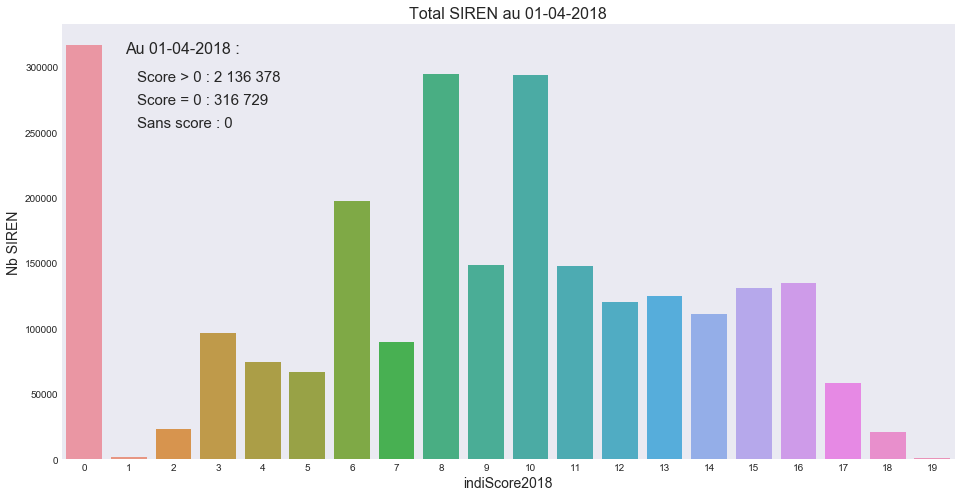

In [26]:
myTitre = 'Total SIREN au ' + DTREF.strftime('%d-%m-%Y')
col1 = 'indiScore' + str(DTREF.year)
n1 = '{:,}'.format(len(df[df[col1]>0])).replace(',', ' ')
n2 = '{:,}'.format(len(df[df[col1]==0])).replace(',', ' ')
n3 = '{:,}'.format(len(df[df[col1].isnull()])).replace(',', ' ')

stats = df[df[col1].notnull()].groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
stats[col1] = stats[col1].astype('int64')
display(stats)

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(stats[col1], stats.siren)
plt.title(myTitre, fontsize=16)
plt.xlabel(col1, fontsize=14)
plt.ylabel('Nb SIREN', fontsize=14)
sns.set_style('dark')
fig.text(.18, .85, 'Au '+DTREF.strftime('%d-%m-%Y')+' :', ha='left', va='top', size=16)
fig.text(.19, .80, 'Score > 0 : '+n1, ha='left', va='top', size=15)
fig.text(.19, .76, 'Score = 0 : '+n2, ha='left', va='top', size=15)
fig.text(.19, .72, 'Sans score : '+n3, ha='left', va='top', size=15)
plt.show()
fig.savefig(CT_DIR_SAVE + myTitre + '.png')

## Historique des SIREN tombés à 0

In [8]:
# Outliers
def cleanOutliers(p_df):
    # On enlève les absorptions (procol A ou évènement de la liste)
    p_df = p_df[(p_df['procol']!='A')]
    p_df = p_df[~(p_df['lastTypeEvents'].str.contains('2620') | p_df['lastTypeEvents'].str.contains('2621') | 
          p_df['lastTypeEvents'].str.contains('2720') | p_df['lastTypeEvents'].str.contains('2725') | 
          p_df['lastTypeEvents'].str.contains('5700') | p_df['lastTypeEvents'].str.contains('5500') | 
          p_df['lastTypeEvents'].str.contains('5501') | p_df['lastTypeEvents'].str.contains('5502') | 
          p_df['lastTypeEvents'].str.contains('5503') | p_df['lastTypeEvents'].str.contains('5510'))]
    return p_df

In [18]:
def make_stats(p_df, p_annee, p_duree=1):
    dt0 = datetime(DTREF.year-p_annee, DTREF.month, DTREF.day)
    col0 = 'indiScore' + str(dt0.year)
    procol0 = 'procol' + str(dt0.year)
    dt1 = datetime(DTREF.year-p_annee-p_duree, DTREF.month, DTREF.day)
    col1 = 'indiScore' + str(dt1.year)

    myTitre = 'Total SIREN avec un score positif au ' + dt1.strftime('%d-%m-%Y')
    tmp = p_df[['siren', col1, col0, procol0, 'lastTypeEvents']]
    tmp = tmp[tmp[col1]>0]

    n1 = '{:,}'.format(len(tmp)).replace(',', ' ')
    n2 = '{:,}'.format(len(p_df[p_df[col1]==0])).replace(',', ' ')
    n3 = '{:,}'.format(len(p_df[p_df[col1].isnull()])).replace(',', ' ')
    
    print(n1, myTitre)
    print(n2, 'SIREN avec un score à 0 au ' + dt1.strftime('%d-%m-%Y'))
    print(n3, 'SIREN sans score au ' + dt1.strftime('%d-%m-%Y'))
    #display(tmp.head())
    
    stats = tmp.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    stats[col1] = stats[col1].astype('int64')
    #display(stats)
    
    # Graphique 1 : Stats globales
    if p_duree==1:
        fig, ax = plt.subplots(figsize=(16, 8))
        sns.barplot(stats[col1], stats.siren)
        plt.title(myTitre, fontsize=16)
        plt.xlabel(col1, fontsize=14)
        plt.ylabel('Nb SIREN', fontsize=14)
        sns.set_style('dark')
        fig.text(.14, .85, 'Au '+dt1.strftime('%d-%m-%Y')+' :', ha='left', va='top', size=16)
        fig.text(.15, .80, 'Score > 0 : '+n1, ha='left', va='top', size=15)
        fig.text(.15, .76, 'Score = 0 : '+n2, ha='left', va='top', size=15)
        fig.text(.15, .72, 'Sans score : '+n3, ha='left', va='top', size=15)
        plt.show()
        fig.savefig(CT_DIR_SAVE + myTitre + '.png')
    
    # Scores tombés à 0 mais pas en absorption
    myTitre += ' et un score à 0 au ' + dt0.strftime('%d-%m-%Y') + ' (hors absorption)'
    dfzero = tmp[(tmp[col0]==0)]
    n5 = '{:,}'.format(len(dfzero)).replace(',', ' ')
    # On enlève les absorptions (procol A ou évènement de la liste)
    dfzero = dfzero[(dfzero[procol0]!='A')]
    dfzero = dfzero[~(dfzero['lastTypeEvents'].str.contains('2620') | dfzero['lastTypeEvents'].str.contains('2621') | 
                      dfzero['lastTypeEvents'].str.contains('2720') | dfzero['lastTypeEvents'].str.contains('2725') | 
                      dfzero['lastTypeEvents'].str.contains('5700') | dfzero['lastTypeEvents'].str.contains('5500') | 
                      dfzero['lastTypeEvents'].str.contains('5501') | dfzero['lastTypeEvents'].str.contains('5502') | 
                      dfzero['lastTypeEvents'].str.contains('5503') | dfzero['lastTypeEvents'].str.contains('5510'))]

    n4 = '{:,}'.format(len(dfzero)).replace(',', ' ')
    print(n4, myTitre)
    
    statszero = dfzero.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    statszero = statszero.rename(columns = {'siren':'Nb défauts'})
    statszero[col1] = statszero[col1].astype('int64')

    # Pour comparer on regarde ici les scores à 0 absorptions comprises
    dfabs = tmp[(tmp[col0]==0)]
    statsabs = dfabs.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    statsabs = statsabs.rename(columns = {'siren':'Absorptions'})
    statsabs[col1] = statsabs[col1].astype('int64')
    
    # Graphique 2 : Siren tombés à 0
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(statsabs[col1], statsabs['Absorptions'], color='k', label="Part des absorptions")
    sns.barplot(statszero[col1], statszero['Nb défauts'])
    plt.legend()
    plt.xlabel(col1, fontsize=14)
    plt.ylabel('Nb SIREN', fontsize=14)
    plt.title(myTitre, fontsize=16)
    #fig.text(.14, .85, 'Total SIREN : '+n5, ha='left', va='top', size=16)
    #fig.text(.14, .80, 'Total hors absorption : '+n4, ha='left', va='top', size=16)
    fig.text(.88, .81, 'Total défauts : '+n4, ha='right', va='top', size=16)
    plt.show()
    fig.savefig(CT_DIR_SAVE + myTitre + '.png')

    stats = stats.merge(statszero)
    stats['pourcent'] = round(stats['Nb défauts'] / stats['siren'] * 100, 2)
    stats = stats.merge(statsabs)
    stats['pourcentabs'] = round(stats['Absorptions'] / stats['siren'] * 100, 2)
    display(stats)
    
    # Graphique 3 : Siren tombés à 0 - Pourcentage
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(stats[col1], stats['pourcentabs'], color='k', label="Part des absorptions")
    sns.barplot(stats[col1], stats['pourcent'])
    plt.legend()
    plt.xlabel(col1, fontsize=14)
    plt.ylabel('Pourcentage', fontsize=14)
    plt.title(myTitre + ' - Pourcentage', fontsize=16)
    #fig.text(.88, .81, 'Total SIREN : '+n5, ha='right', va='top', size=16)
    #fig.text(.88, .76, 'Total hors absorption : '+n4, ha='right', va='top', size=16)
    fig.text(.88, .81, 'Total défauts : '+n4, ha='right', va='top', size=16)
    plt.show()
    fig.savefig(CT_DIR_SAVE + myTitre + ' - Pourcentage' + '.png')
    
    if (p_annee==0 and p_duree==1):
        print('SIREN passés de 19 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]>=19].siren))
        print('SIREN passés de 18 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]==18].siren))
        #print('SIREN passés de 17 à 0 :')
        #print(','.join(str(s) for s in dfzero[dfzero[col1]==17].siren))
        #print('SIREN passés de 16 à 0 :')
        #print(','.join(str(s) for s in dfzero[dfzero[col1]==16].siren))


1 194 609 Total SIREN avec un score positif au 01-04-2017
110 954 SIREN avec un score à 0 au 01-04-2017
1 147 544 SIREN sans score au 01-04-2017


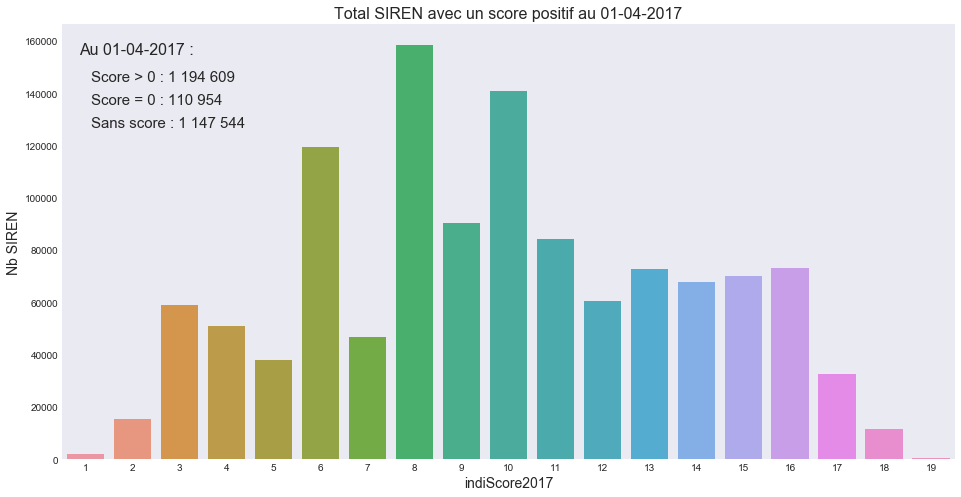

60 456 Total SIREN avec un score positif au 01-04-2017 et un score à 0 au 01-04-2018 (hors absorption)


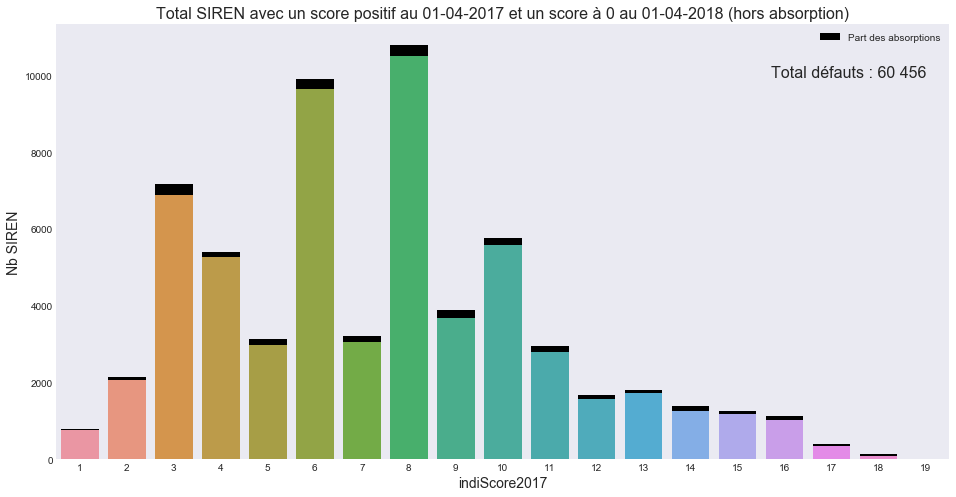

,indiScore2017,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,2040,774,37.94,786,38.53
1,2,15393,2057,13.36,2151,13.97
2,3,59068,6901,11.68,7169,12.14
3,4,50838,5272,10.37,5404,10.63
4,5,37888,2982,7.87,3134,8.27
5,6,119370,9643,8.08,9913,8.30
6,7,46601,3050,6.54,3214,6.90
7,8,158406,10521,6.64,10797,6.82
8,9,90546,3677,4.06,3880,4.29
9,10,140982,5589,3.96,5771,4.09


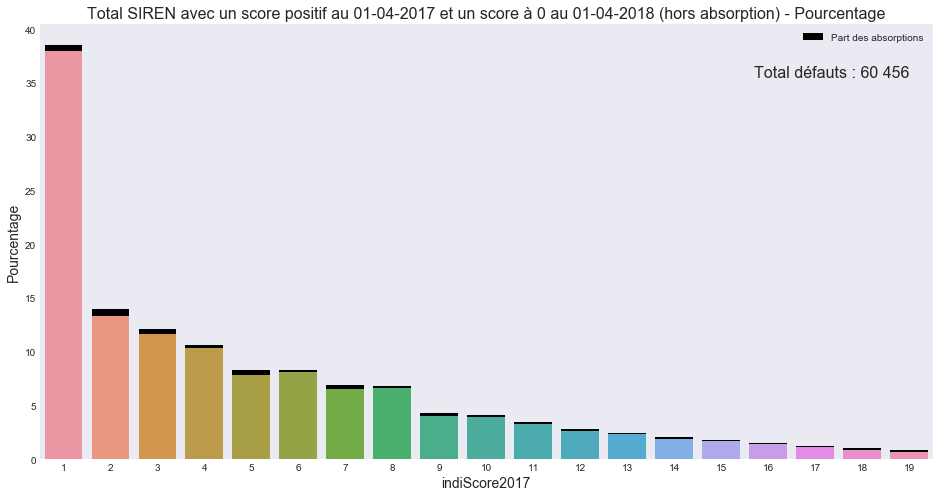

SIREN passés de 19 à 0 :
443457726,443736483,458505625,552137283
SIREN passés de 18 à 0 :
304043847,310190129,316680032,319537742,321814121,322214669,323722140,324593326,326943321,329937924,331748046,337866487,338656507,338839103,339727471,342383536,344071451,348118555,349350520,352885081,353924418,377928270,379102825,379437031,380055525,380356915,382667855,383713948,384809836,385131016,385397310,387804586,388466401,388614778,390406270,391939733,392035218,393435631,393515945,393561675,394789762,399111244,399605971,401645700,402777171,404130494,405146382,405253188,410001309,410366082,412332058,414993519,417566981,417693272,417725025,419519665,420575813,423947183,424052074,428756886,438683104,440046753,440398790,440822906,441233095,443076351,445176605,446450173,447513177,448080200,448468512,449591924,472501709,478773393,480036722,482985371,483985545,484300694,485243240,485384333,491055091,495383655,504155219,509037297,509393674,510067184,519260343,520214891,523118693,541820452,542077151,

In [19]:
# On travaille sur les SIREN positifs 1 an avant
make_stats(df, 0)

658 023 Total SIREN avec un score positif au 01-04-2016
44 463 SIREN avec un score à 0 au 01-04-2016
1 750 621 SIREN sans score au 01-04-2016


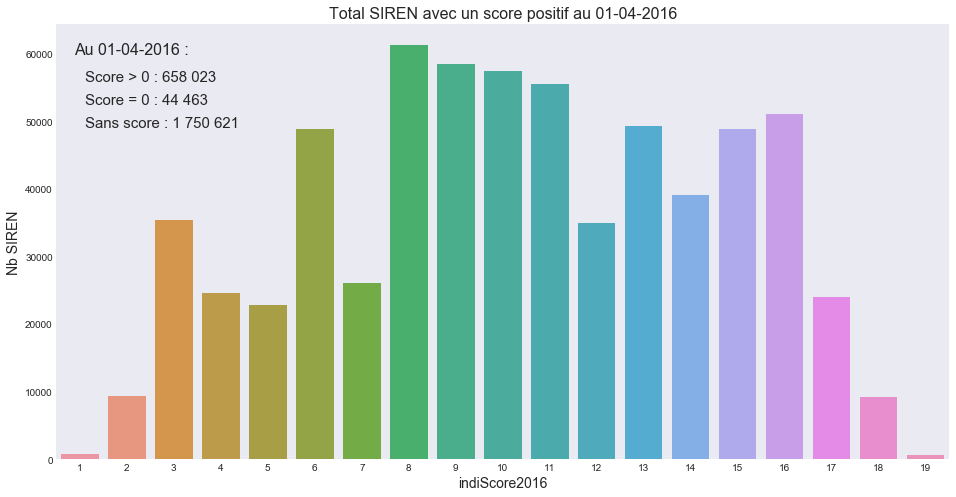

14 130 Total SIREN avec un score positif au 01-04-2016 et un score à 0 au 01-04-2017 (hors absorption)


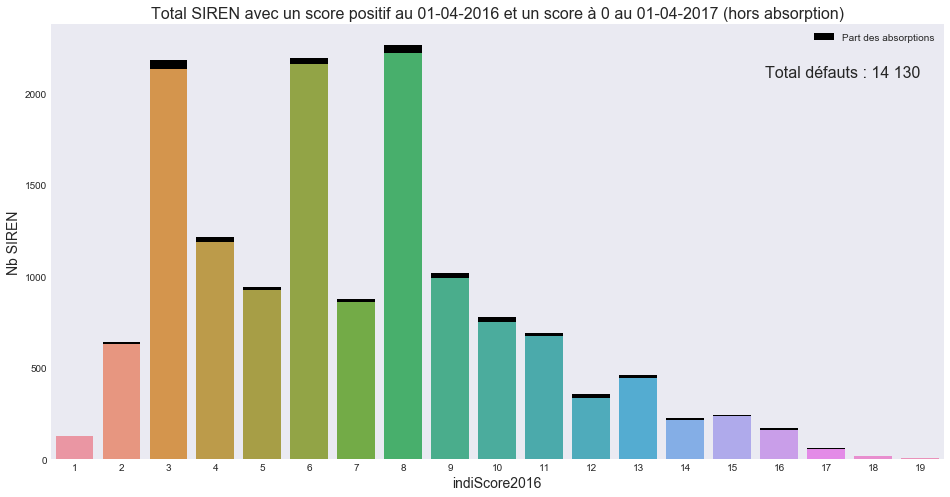

,indiScore2016,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,770,130,16.88,130,16.88
1,2,9385,629,6.70,642,6.84
2,3,35457,2133,6.02,2180,6.15
3,4,24610,1189,4.83,1215,4.94
4,5,22876,926,4.05,943,4.12
5,6,48925,2158,4.41,2194,4.48
6,7,26013,860,3.31,874,3.36
7,8,61269,2222,3.63,2263,3.69
8,9,58518,993,1.70,1018,1.74
9,10,57406,749,1.30,780,1.36


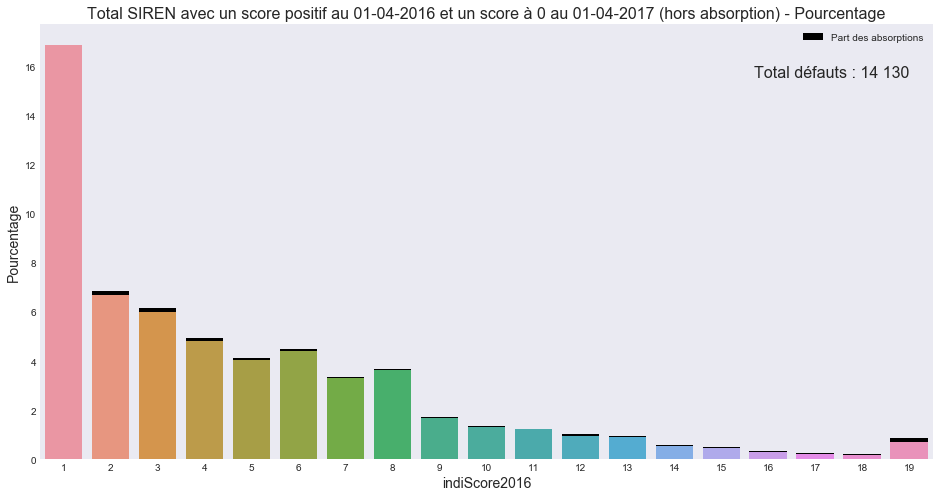

In [20]:
make_stats(df, 1)

449 829 Total SIREN avec un score positif au 01-04-2015
27 031 SIREN avec un score à 0 au 01-04-2015
1 976 247 SIREN sans score au 01-04-2015


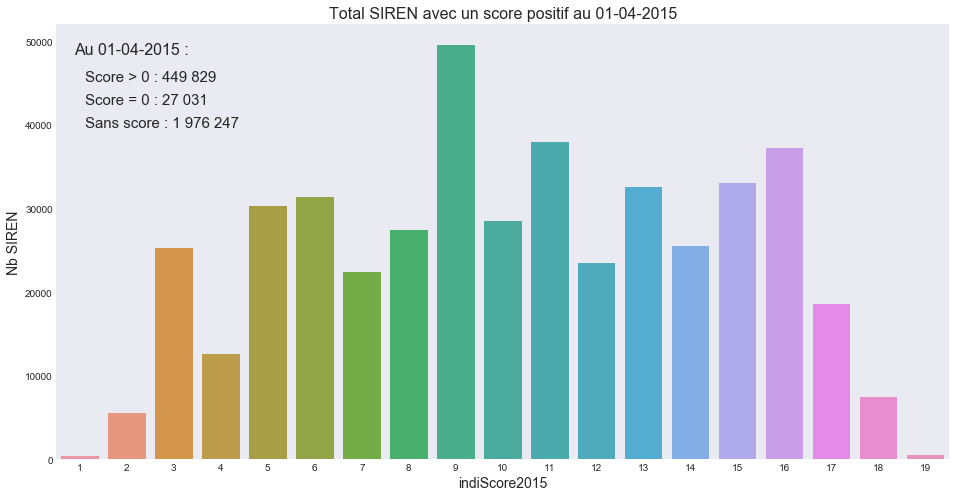

13 033 Total SIREN avec un score positif au 01-04-2015 et un score à 0 au 01-04-2016 (hors absorption)


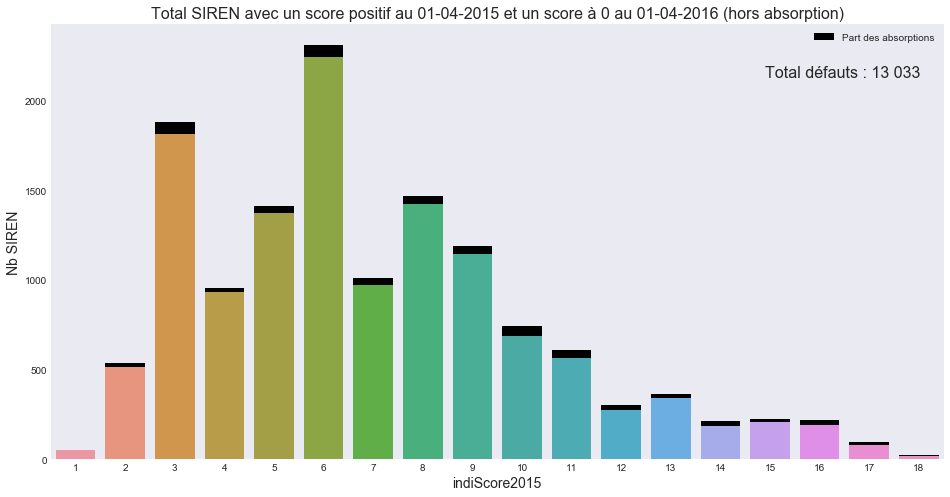

,indiScore2015,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,376,52,13.83,52,13.83
1,2,5509,514,9.33,537,9.75
2,3,25243,1815,7.19,1880,7.45
3,4,12554,933,7.43,958,7.63
4,5,30278,1372,4.53,1412,4.66
5,6,31448,2244,7.14,2310,7.35
6,7,22379,972,4.34,1009,4.51
7,8,27458,1426,5.19,1470,5.35
8,9,49571,1147,2.31,1191,2.40
9,10,28557,689,2.41,744,2.61


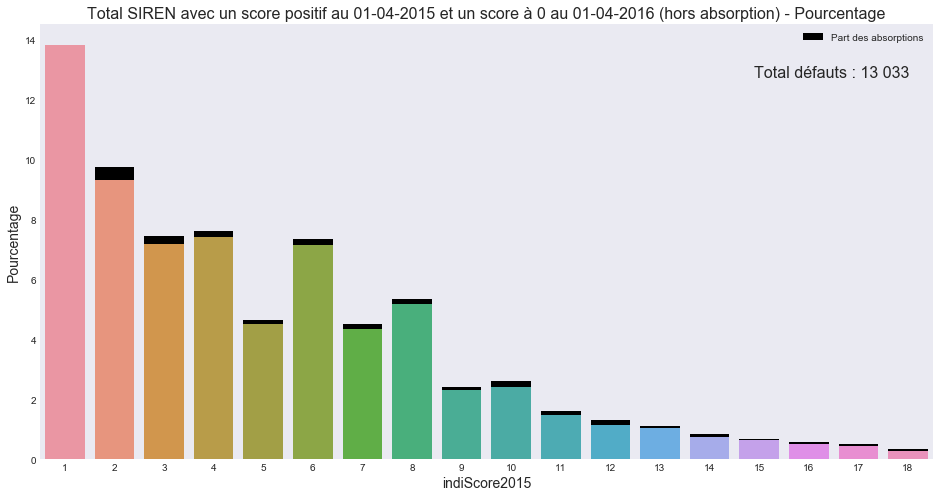

In [21]:
make_stats(df, 2)

360 056 Total SIREN avec un score positif au 01-04-2014
14 205 SIREN avec un score à 0 au 01-04-2014
2 078 846 SIREN sans score au 01-04-2014


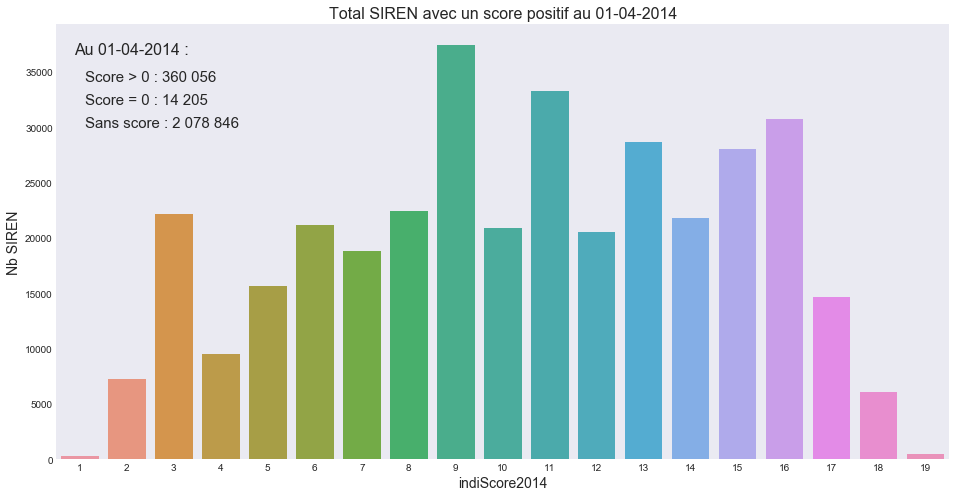

8 657 Total SIREN avec un score positif au 01-04-2014 et un score à 0 au 01-04-2015 (hors absorption)


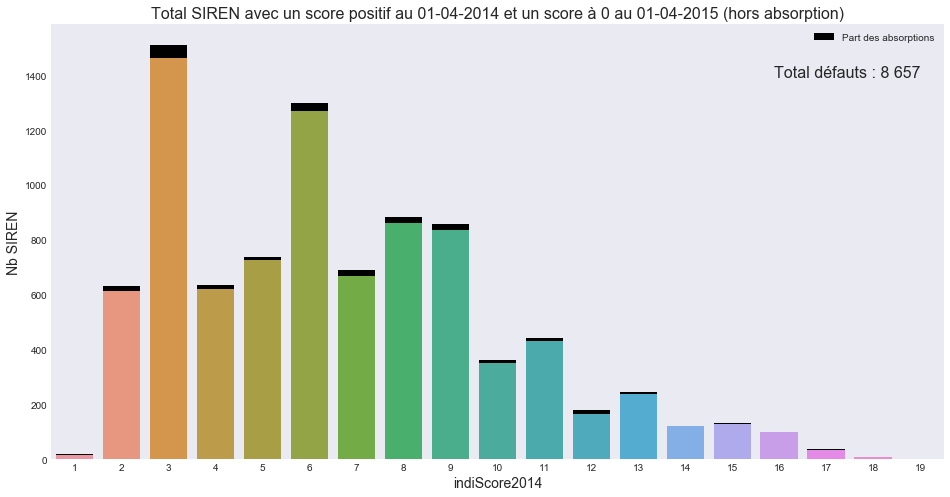

,indiScore2014,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,340,16,4.71,18,5.29
1,2,7236,615,8.50,633,8.75
2,3,22162,1462,6.60,1510,6.81
3,4,9561,620,6.48,635,6.64
4,5,15638,725,4.64,738,4.72
5,6,21156,1269,6.00,1300,6.14
6,7,18849,669,3.55,690,3.66
7,8,22430,863,3.85,884,3.94
8,9,37439,836,2.23,857,2.29
9,10,20897,352,1.68,361,1.73


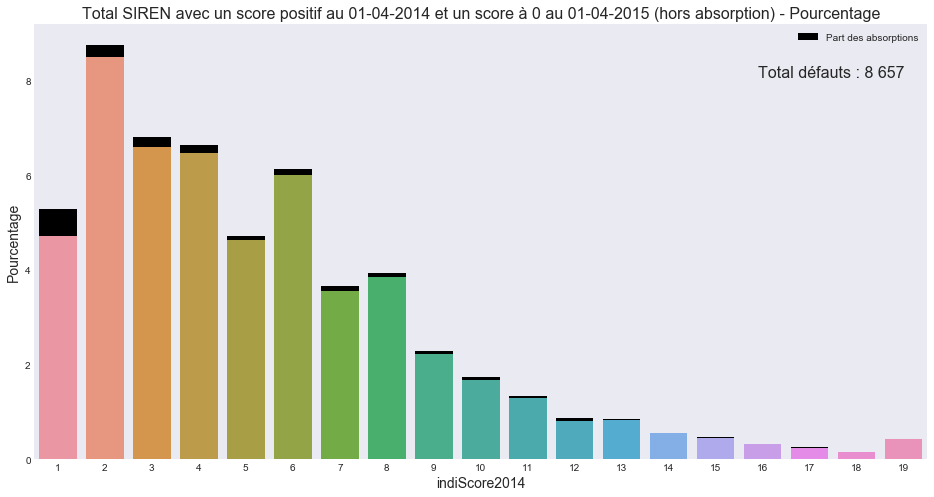

In [22]:
make_stats(df, 3)

658 023 Total SIREN avec un score positif au 01-04-2016
44 463 SIREN avec un score à 0 au 01-04-2016
1 750 621 SIREN sans score au 01-04-2016
50 671 Total SIREN avec un score positif au 01-04-2016 et un score à 0 au 01-04-2018 (hors absorption)


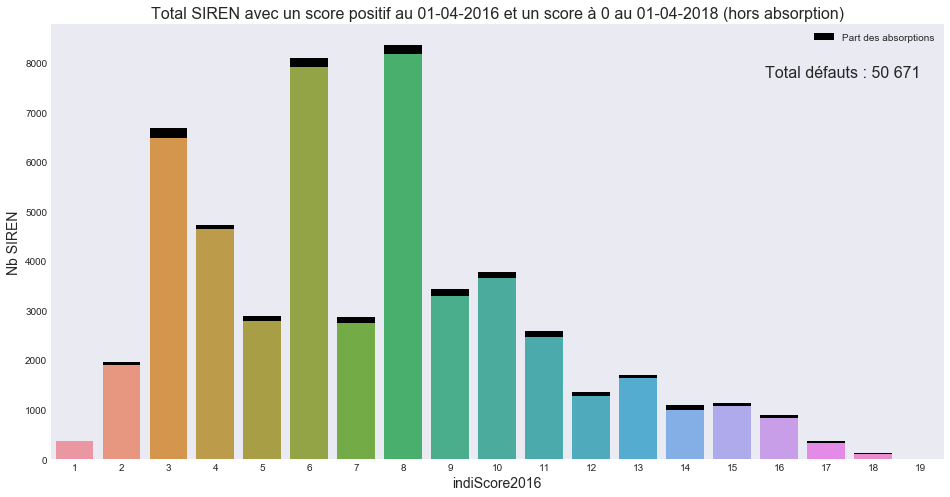

,indiScore2016,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,770,369,47.92,369,47.92
1,2,9385,1898,20.22,1966,20.95
2,3,35457,6476,18.26,6680,18.84
3,4,24610,4637,18.84,4724,19.20
4,5,22876,2790,12.20,2899,12.67
5,6,48925,7913,16.17,8090,16.54
6,7,26013,2758,10.60,2869,11.03
7,8,61269,8180,13.35,8352,13.63
8,9,58518,3294,5.63,3425,5.85
9,10,57406,3652,6.36,3773,6.57


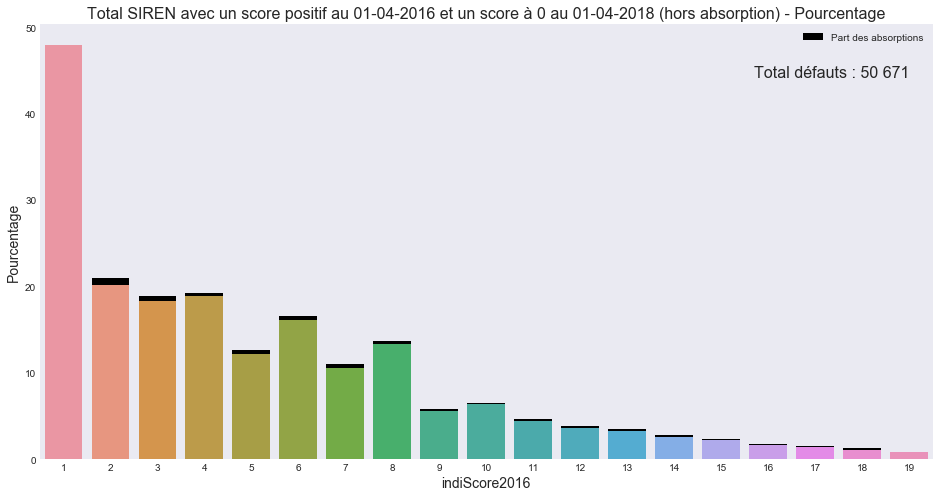

In [23]:
# On travaille sur les SIREN positifs 2 ans avant
make_stats(df, 0, 2)

449 829 Total SIREN avec un score positif au 01-04-2015
27 031 SIREN avec un score à 0 au 01-04-2015
1 976 247 SIREN sans score au 01-04-2015
34 204 Total SIREN avec un score positif au 01-04-2015 et un score à 0 au 01-04-2018 (hors absorption)


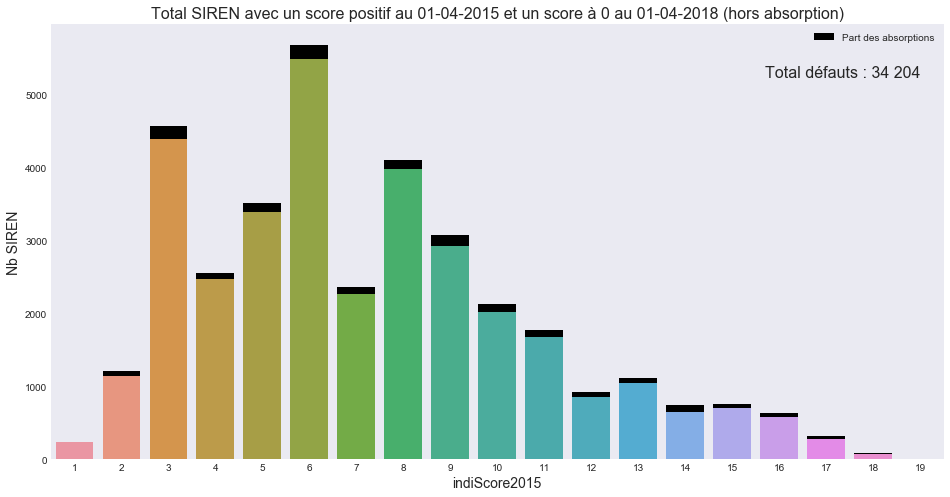

,indiScore2015,siren,Nb défauts,pourcent,Absorptions,pourcentabs
0,1,376,234,62.23,234,62.23
1,2,5509,1146,20.80,1210,21.96
2,3,25243,4396,17.41,4579,18.14
3,4,12554,2478,19.74,2564,20.42
4,5,30278,3394,11.21,3513,11.60
5,6,31448,5497,17.48,5685,18.08
6,7,22379,2272,10.15,2365,10.57
7,8,27458,3978,14.49,4110,14.97
8,9,49571,2932,5.91,3080,6.21
9,10,28557,2023,7.08,2130,7.46


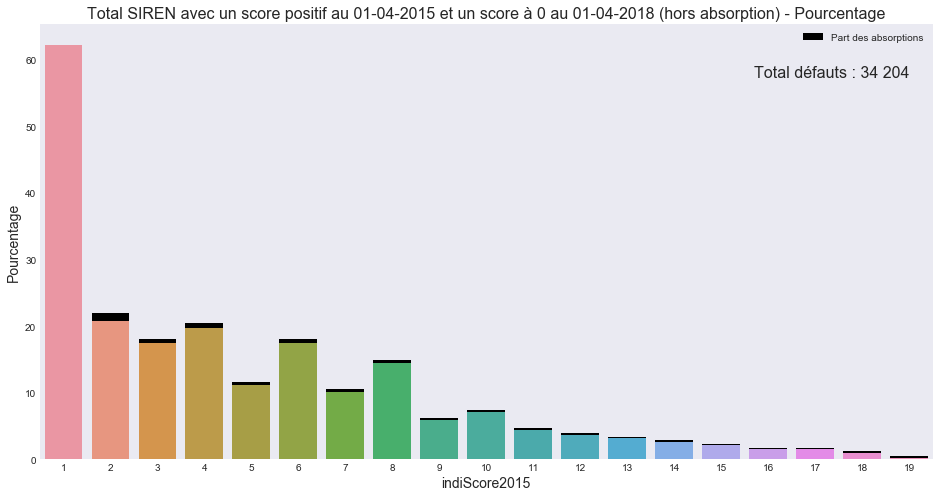

In [24]:
# On travaille sur les SIREN positifs 3 ans avant
make_stats(df, 0, 3)